In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split

In [2]:
#loading boston data
boston = datasets.load_boston(return_X_y=False)
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [3]:
X = boston.data
y = boston.target.reshape(-1,1)
print("Shape of data is {}".format(X.shape))
print("Shape of target is {}".format(y.shape))

Shape of data is (506, 13)
Shape of target is (506, 1)


In [4]:
X = np.insert(X,0,np.ones(X.shape[0]),axis = 1)
print("Shape of data is {}".format(X.shape))

Shape of data is (506, 14)


In [5]:
#splitting data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state = 0)
print("Shape of training data is {}".format(X_train.shape))
print("Shape of testing data is {}".format(X_test.shape))

Shape of training data is (303, 14)
Shape of testing data is (203, 14)


**Manual Development of OLS**

In [6]:

temp_1 = np.linalg.inv(np.matmul(X_train.T,X_train))
temp_2 = np.matmul(temp_1,X_train.T)
theta = np.matmul(temp_2,y_train)
print(theta.shape)

(14, 1)


In [15]:
theta

array([[ 4.54814196e+01],
       [-1.03747356e-01],
       [ 5.58589924e-02],
       [ 5.88240770e-02],
       [ 2.50523544e+00],
       [-1.90284888e+01],
       [ 3.25353601e+00],
       [-3.22150522e-03],
       [-1.57603462e+00],
       [ 2.58716068e-01],
       [-1.14681299e-02],
       [-1.10777478e+00],
       [ 5.50051783e-03],
       [-5.59569992e-01]])

In [7]:
print(X_test.shape)

(203, 14)


In [8]:
#predictions
y_hat = np.dot(theta.T,X_test.T) #scaler multipication

In [9]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_hat.T)
print(mse)

25.790362150701014


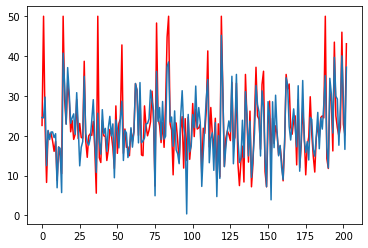

In [26]:
#plotting
fig,ax = plt.subplots()
ax.plot(y_test,"r-")
ax.plot(y_hat.T)


**Doing with Scikit learn library**

In [13]:
reg = linear_model.LinearRegression(fit_intercept = False)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [30]:
print("The coffecients of Regression model are: \n {}".format(reg.coef_))

The coffecients of Regression model are: 
 [[ 4.54814196e+01 -1.03747356e-01  5.58589924e-02  5.88240770e-02
   2.50523544e+00 -1.90284888e+01  3.25353601e+00 -3.22150522e-03
  -1.57603462e+00  2.58716068e-01 -1.14681299e-02 -1.10777478e+00
   5.50051783e-03 -5.59569992e-01]]


In [17]:
yhat = reg.predict(X_test)
mse = mean_squared_error(y_test,yhat)
print(mse)

25.790362150702602


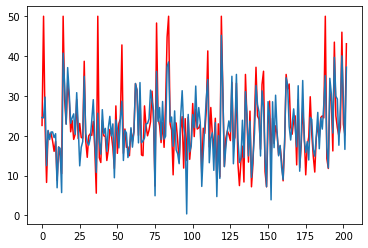

In [31]:
#plotting the actual and predicted
fig,ax = plt.subplots()
ax.plot(y_test,"r-")
ax.plot(yhat)

From the activity we can concile the error that both by Manual development and by Scikit  learn we achieve same result